# Segmenting and Clustering Neighborhoods in Toronto
The answers for the 3 Questions in the assignment are included in this notebook, please scroll down through the document to visualise each of the answers.

## Question 1 - Load Data from Wiki Table and Clean up
In this first section of this notebook, we will gather the data from the various neighborhoods in Toronto and store it into a dataframe, which will be subsequently cleaned as per requested in the assignment instructions.

In [2]:
## Let's get the required libraries and the data

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
req = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(req.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
neighborhood=pd.DataFrame(df[0])

In [3]:
neighborhood.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
## Let's drop the Boroughs rows which information appears as "Not Assigned"
neighborhood = neighborhood[neighborhood.Borough != 'Not assigned']

In [7]:
neighborhood.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [5]:
## Let's reset the index in the neighborhood dataframe
neighborhood = neighborhood.reset_index(drop=True)

In [6]:
# And let's replace the potential Neighborhood names which appear as 'Not assigned' with the Borough name 
neighborhood['Neighborhood']=neighborhood['Neighborhood'].replace('Not assigned', neighborhood['Borough'])

In [16]:
neighborhood

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


#### Finally, let's get the size of our dataframe "neighborhood" => there are 103 rows in the Dataframe "neighbourhood"

In [7]:
neighborhood.shape

(103, 3)

---
***
---

## Question 2 - Obtain the longitude and latitude data for the Toronto neighbourhoods
In this second section, we will obtain the longitude latitude data for the various Toronto neighbourhoods from a csv file and will add the information to a dataframe combined with the information we stored in the dataframe in Question 1

In [8]:
## I obtain the coordinates information for each neighborhoud from the link below and store it into a dataframe called coords.
path = 'https://cocl.us/Geospatial_data'
coords = pd.read_csv(path)
coords.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
coords.shape

(103, 3)

In [ ]:
## The "coords" dataframe has the same number of rows as the "neighborhood" dataframe we have done before. Now let's combine the information of
## both dataframes into a single one.

In [10]:
toronto = neighborhood.merge(coords, on='Postal Code')

In [13]:
## Let's visualise the combined dataframe, called "toronto"
toronto

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [14]:
toronto.shape

(103, 5)

***
---
***

# Question 3 - Use Foursquare API data to cluster the various neighborhoods of Toronto.
In this case, we will focus only on the neighborhoods in Toronto which contain the name "Toronto" in the borough category.

In [17]:
## Let's create first a new dataframe only including the neighborhoods which contain the name "Toronto" in the borough category
toronto_reduced = toronto[toronto['Borough'].astype(str).str.contains('Toronto')]
toronto_reduced.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [18]:
## Let's reset the index in the newly created dataframe
toronto_reduced.reset_index(drop=True)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [19]:
toronto_reduced.shape
## We have 39 neighborhoods which comply with the required filters.

(39, 5)

### Now we will use the Folium package to create a blank map of Toronto

In [21]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

In [76]:
# create map of Toronto using latitude and longitude values
latitude = 43.651070
longitude = -79.347015

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_reduced['Latitude'], toronto_reduced['Longitude'], toronto_reduced['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

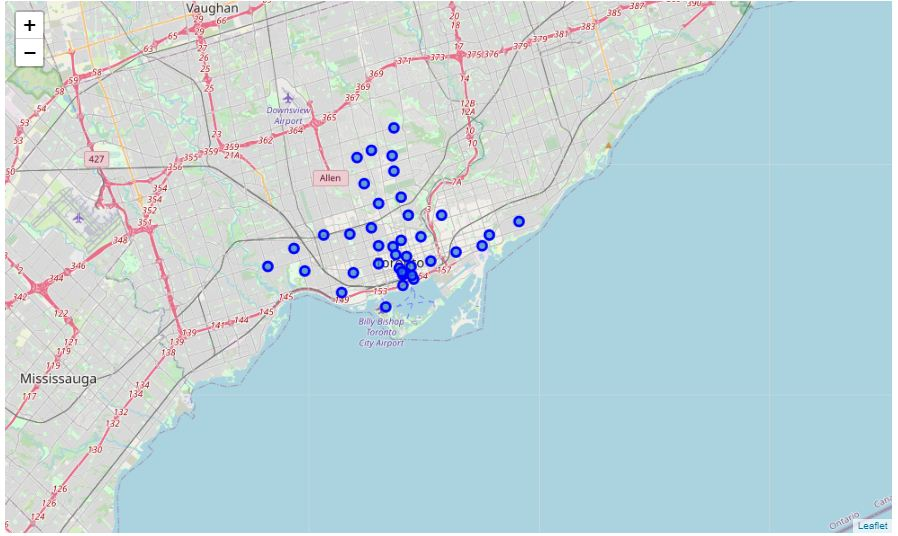

### Let's get information from the Foursquare API

In [77]:
######## CLIENT_ID AND CLIENT_SECRET UPDATED TO XXXXXXXXXXXXXXXX AFTER RUNNING EXERCISE TO HIDE ID CREDENTIALS##############

CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXXXXXXXXXXXXXXXXXXXXX
CLIENT_SECRET:XXXXXXXXXXXXXXXXXXXXXXX


In [26]:
## Let's define a function to check neighbourhoods

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
### Now we will run the above code on each neighborhood and create a new dataframe called toronto_venues.
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

toronto_venues = getNearbyVenues(names=toronto_reduced['Neighborhood'],
                                   latitudes=toronto_reduced['Latitude'],
                                   longitudes=toronto_reduced['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [29]:
## Now we have got the venue information from our list of neighborhoods into a dataframe called toronto_venues. Let's explore it.

print(toronto_venues.shape)
toronto_venues.head()

(1622, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub


In [30]:
## Let's see how many venues there are in each neighbourhood

toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",17,17,17,17,17,17
Central Bay Street,65,65,65,65,65,65
Christie,16,16,16,16,16,16
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,35,35,35,35,35,35


In [31]:
## Let's check how many categories are:

print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 233 unique categories.


### Now we use the one hot encoding technique to get each unique venue category as a column, so that we can then use the dataframe in this format for the k-means clustering analysis

In [38]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

## let's explore the resulting new dataframe
toronto_onehot['Neighborhood'].head(15)

0     Regent Park, Harbourfront
1     Regent Park, Harbourfront
2     Regent Park, Harbourfront
3     Regent Park, Harbourfront
4     Regent Park, Harbourfront
5     Regent Park, Harbourfront
6     Regent Park, Harbourfront
7     Regent Park, Harbourfront
8     Regent Park, Harbourfront
9     Regent Park, Harbourfront
10    Regent Park, Harbourfront
11    Regent Park, Harbourfront
12    Regent Park, Harbourfront
13    Regent Park, Harbourfront
14    Regent Park, Harbourfront
Name: Neighborhood, dtype: object

In [39]:
toronto_onehot.head(10)

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
toronto_onehot.shape

(1622, 233)

### Now, we will group all the rows by neighborhood and will calculate mean frequencies for each category

In [40]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped


,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.015385,0.000000,0.000000,0.015385,0.000000,0.000000
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.025974,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,...,0.012987,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.028571,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
toronto_grouped.shape
# The number of rows now is 39, the number of neighborhoods in those boroughs containing the term "Toronto"

(39, 233)

### Now we will create a function to extract the top 10 venues in each neighborhood and store it in a dataframe

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Café,Cheese Shop,Bakery,Seafood Restaurant,Restaurant,Beer Bar,Lounge,Park
1,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Breakfast Spot,Coffee Shop,Grocery Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Auto Workshop,Skate Park,Light Rail Station,Burrito Place,Farmers Market,Fast Food Restaurant,Butcher,Restaurant,Recording Studio
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Boutique,Rental Car Location,Plane,Coffee Shop,Boat or Ferry,Harbor / Marina
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Japanese Restaurant,Café,Bar,Burger Joint,Salad Place,Thai Restaurant,Department Store


### Now that we have the data in the right format we can do k means clustering, and we will cluster the various neighborhoods into 5 clusters (k=5)

In [48]:
#Let's import the required package
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:28] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 1, 0,
       0, 0, 0, 0, 2, 3], dtype=int32)

### Now we create a new dataframe with the cluster ID and the top 10 venues for each neighborhood

In [55]:
# add clustering labels
neighborhoods_venues_sorted.head(29)

toronto_final = neighborhoods_venues_sorted.merge(toronto_reduced, on='Neighborhood')

toronto_final.head(20)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
0,0,Berczy Park,Coffee Shop,Cocktail Bar,Café,Cheese Shop,Bakery,Seafood Restaurant,Restaurant,Beer Bar,Lounge,Park,M5E,Downtown Toronto,43.644771,-79.373306
1,0,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Breakfast Spot,Coffee Shop,Grocery Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store,M6K,West Toronto,43.636847,-79.428191
2,0,"Business reply mail Processing Centre, South C...",Yoga Studio,Auto Workshop,Skate Park,Light Rail Station,Burrito Place,Farmers Market,Fast Food Restaurant,Butcher,Restaurant,Recording Studio,M7Y,East Toronto,43.662744,-79.321558
3,0,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Boutique,Rental Car Location,Plane,Coffee Shop,Boat or Ferry,Harbor / Marina,M5V,Downtown Toronto,43.628947,-79.394420
4,0,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Japanese Restaurant,Café,Bar,Burger Joint,Salad Place,Thai Restaurant,Department Store,M5G,Downtown Toronto,43.657952,-79.387383
5,0,Christie,Grocery Store,Café,Park,Baby Store,Candy Store,Coffee Shop,Diner,Nightclub,Italian Restaurant,Restaurant,M6G,Downtown Toronto,43.669542,-79.422564
6,0,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Bubble Tea Shop,Pub,Yoga Studio,Hotel,Men's Store,M4Y,Downtown Toronto,43.665860,-79.383160
7,0,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Restaurant,Hotel,American Restaurant,Gym,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Deli / Bodega,M5L,Downtown Toronto,43.648198,-79.379817
8,0,Davisville,Pizza Place,Dessert Shop,Sandwich Place,Sushi Restaurant,Coffee Shop,Gym,Italian Restaurant,Café,Seafood Restaurant,Brewery,M4S,Central Toronto,43.704324,-79.388790
9,0,Davisville North,Park,Gym,Breakfast Spot,Dog Run,Sandwich Place,Food & Drink Shop,Hotel,Department Store,Deli / Bodega,Eastern European Restaurant,M4P,Central Toronto,43.712751,-79.390197


### After having completed the previous analysis, we can now plot the results with the generated clusters in the Toronto map

In [60]:
# Import required modules for plotting
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_final['Latitude'], toronto_final['Longitude'], toronto_final['Neighborhood'], toronto_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Now we have the final map with the neighborhoods clustered into the 5 different areas. Let's try to explore a little bit each of the 5 clusters.

In [61]:
toronto_final.groupby('Cluster Labels')['Neighborhood'].count()

Cluster Labels
0    34
1     1
2     2
3     1
4     1
Name: Neighborhood, dtype: int64

#### We can observe that the "Cluster 0" includes most of the 39 neighborhoods of Toronto, whereas the Clusters 1, 2, 3 and 4 only have a very reduced amount of neighborhoods on them (1 or 2). Let's try to understand the key characteristics of those 2 neighborhoods.

In [68]:
toronto_final.groupby('Cluster Labels').count()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
Cluster Labels,,,,,,,,,,,,,,,
0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [70]:
## Cluster 0
toronto_final.loc[toronto_final['Cluster Labels'] == 0, toronto_final.columns[[1] + list(range(1, toronto_final.shape[1]))]]

,Neighborhood,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
0,Berczy Park,Berczy Park,Coffee Shop,Cocktail Bar,Café,Cheese Shop,Bakery,Seafood Restaurant,Restaurant,Beer Bar,Lounge,Park,M5E,Downtown Toronto,43.644771,-79.373306
1,"Brockton, Parkdale Village, Exhibition Place","Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Breakfast Spot,Coffee Shop,Grocery Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store,M6K,West Toronto,43.636847,-79.428191
2,"Business reply mail Processing Centre, South C...","Business reply mail Processing Centre, South C...",Yoga Studio,Auto Workshop,Skate Park,Light Rail Station,Burrito Place,Farmers Market,Fast Food Restaurant,Butcher,Restaurant,Recording Studio,M7Y,East Toronto,43.662744,-79.321558
3,"CN Tower, King and Spadina, Railway Lands, Har...","CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Boutique,Rental Car Location,Plane,Coffee Shop,Boat or Ferry,Harbor / Marina,M5V,Downtown Toronto,43.628947,-79.394420
4,Central Bay Street,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Japanese Restaurant,Café,Bar,Burger Joint,Salad Place,Thai Restaurant,Department Store,M5G,Downtown Toronto,43.657952,-79.387383
5,Christie,Christie,Grocery Store,Café,Park,Baby Store,Candy Store,Coffee Shop,Diner,Nightclub,Italian Restaurant,Restaurant,M6G,Downtown Toronto,43.669542,-79.422564
6,Church and Wellesley,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Bubble Tea Shop,Pub,Yoga Studio,Hotel,Men's Store,M4Y,Downtown Toronto,43.665860,-79.383160
7,"Commerce Court, Victoria Hotel","Commerce Court, Victoria Hotel",Coffee Shop,Café,Restaurant,Hotel,American Restaurant,Gym,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Deli / Bodega,M5L,Downtown Toronto,43.648198,-79.379817
8,Davisville,Davisville,Pizza Place,Dessert Shop,Sandwich Place,Sushi Restaurant,Coffee Shop,Gym,Italian Restaurant,Café,Seafood Restaurant,Brewery,M4S,Central Toronto,43.704324,-79.388790
9,Davisville North,Davisville North,Park,Gym,Breakfast Spot,Dog Run,Sandwich Place,Food & Drink Shop,Hotel,Department Store,Deli / Bodega,Eastern European Restaurant,M4P,Central Toronto,43.712751,-79.390197


In [71]:
## Cluster 1
toronto_final.loc[toronto_final['Cluster Labels'] == 1, toronto_final.columns[[1] + list(range(1, toronto_final.shape[1]))]]

,Neighborhood,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
20,"Moore Park, Summerhill East","Moore Park, Summerhill East",Gym,Trail,Women's Store,Dance Studio,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,M4T,Central Toronto,43.689574,-79.38316


In [72]:
## Cluster 2
toronto_final.loc[toronto_final['Cluster Labels'] == 2, toronto_final.columns[[1] + list(range(1, toronto_final.shape[1]))]]

,Neighborhood,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
12,"Forest Hill North & West, Forest Hill Road Park","Forest Hill North & West, Forest Hill Road Park",Park,Jewelry Store,Trail,Sushi Restaurant,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,M5P,Central Toronto,43.696948,-79.411307
26,Rosedale,Rosedale,Park,Playground,Trail,Cupcake Shop,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,M4W,Downtown Toronto,43.679563,-79.377529


In [73]:
## Cluster 3
toronto_final.loc[toronto_final['Cluster Labels'] == 3, toronto_final.columns[[1] + list(range(1, toronto_final.shape[1]))]]

,Neighborhood,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
27,Roselawn,Roselawn,Garden,Music Venue,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,M5N,Central Toronto,43.711695,-79.416936


In [74]:
## Cluster 4
toronto_final.loc[toronto_final['Cluster Labels'] == 4, toronto_final.columns[[1] + list(range(1, toronto_final.shape[1]))]]

,Neighborhood,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
18,Lawrence Park,Lawrence Park,Park,Swim School,Bus Line,Falafel Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,M4N,Central Toronto,43.72802,-79.38879


### After analysing each of the 5 clusters, we could say that:
**Cluster 0** - the most common one, seems to be characterised for having multiple restaurants and coffee shops, as well as grocery and food shopping departments.   
**Cluster 1** - seems to be a cluster more dedicated to indoors physical wellbeing and exercising, mostly containing gyms and dance studios, and also then some restaurants and shops. It can potentially be like a retail shopping center area.     
**Cluster 2** - seems to be a cluster containing open air spaces for recreation, such as parks, playgrounds and trails.     
**Cluster 3** - seems to be an area more oriented towards artistics arts, for example havng gardens, music venues and dance studios.     
**Cluster 4** - seems to be also a cluster are more orientated towards physical activities bth open air and closed air, including venues such as park and swim schools. Considering the big proprortion of Bus Lines in this area, and looking into the map, this area is in the outskirts of Toronto and the amount of bus lines may be helpflul to allow the University students travel to their classes, since there is a university campus very close to this cluster.

END